# Metodología CRISP-DM

Se utilizara la metodologia CRISP-DM la cual cuenta con 6 etapas como se muestran en el grafico a cointinuación:

![Grafico CRISP-DM](https://data.sngular.com/uploads/Iy7O6TErQ6V7qBhkbI8slqyFLvjukDMx.)



# Fase I. Business Understanding.
## Definición de necesidades del cliente y comprensión del negocio

Esta fase inicial se enfoca en la comprensión de los objetivos de proyecto. Después se convierte este conocimiento de los datos en la definición de un problema de minería de datos y en un plan preliminar diseñado para alcanzar los objetivos.

Se tiene una DB con distintas caracteristicas de las casas en Boston y su valor correspondiente, se requiere generar un modelo predictivo sobre el valor de una casa.

# Fase II. Data Understanding.
## Estudio y comprensión de los datos

La fase de entendimiento de datos comienza con la colección de datos inicial y continúa con las actividades que permiten familiarizarse con los datos, identificar los problemas de calidad, descubrir conocimiento preliminar sobre los datos, y/o descubrir subconjuntos interesantes para formar hipótesis en cuanto a la información oculta.

El dataset boston tiene como targe el precio de los inmuebles

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

from sklearn.datasets import load_boston

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_validate

from sklearn.neural_network import MLPRegressor

In [0]:

boston = load_boston()

Obtenemos los nombres de las features

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Descripcion de features

CRIM - tasa de criminalidad per cápita por ciudad<br>
ZN - proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados.<br>
INDUS - proporción de acres de negocios no minoristas por ciudad.<br>
CHAS - Variable ficticia de Charles River (1 si el tramo limita con el río; 0 en caso contrario)<br>
NOX - concentración de óxidos nítricos (partes por 10 millones)<br>
RM - número promedio de habitaciones por vivienda<br>
AGE - proporción de unidades ocupadas por sus propietarios construidas antes de 1940<br>
DIS - distancias ponderadas a cinco centros de empleo de Boston<br>
RAD - índice de accesibilidad a carreteras radiales<br>
TAX - tasa de impuesto a la propiedad de valor total por $ 10,000<br>
PTRATIO - relación alumno-profesor por localidad<br>
B - 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por pueblo<br>
LSTAT - % menor estado de la población<br>

# Fase III. Data Preparation
## Análisis de los datos y selección de características

La fase de preparación de datos cubre todas las actividades necesarias para construir el conjunto final de datos (los datos que se utilizarán en las herramientas de modelado) a partir de los datos en bruto iniciales. Las tareas incluyen la selección de tablas, registros y atributos, así como la transformación y la limpieza de datos para las herramientas que modelan.

In [0]:
# Hasignamos nuestras features y nuestros objetivos
X = pd.DataFrame(boston.data, columns= boston.feature_names)
y = boston.target

Revisar que no hallan valores en formatos que no corresponden con el tipo de dato, de lo contrario transformar

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Tamaño de los datos
X.shape

(506, 13)

# Fase IV. Modeling. 
## Modelado

En esta fase, se seleccionan y aplican las técnicas de modelado que sean pertinentes al problema (cuantas más mejor), y se calibran sus parámetros a valores óptimos. Típicamente hay varias técnicas para el mismo tipo de problema de minería de datos. Algunas técnicas tienen requerimientos específicos sobre la forma de los datos. Por lo tanto, casi siempre en cualquier proyecto se acaba volviendo a la fase de preparación de datos.

## Analisis de modelos
### Este es un analisis de regresion, por lo tanto seleccionaremos un algoritmo de regresion, tenemos 506 datos segun la imagen de abajo nos serviria un algoritmo Lasso, ElasticNet, RidgeRegression, SVR o EnsembleRegressor

![texto alternativo](https://scikit-learn.org/stable/_static/ml_map.png)

## Probamos con validacion cruzada que algoritmo nos sirve mas de los anteriormente mencionados

In [7]:
scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
lasso = scores.mean()

scores = cross_val_score(ElasticNet(),X,y,cv=5,scoring='r2')
elastic_net = scores.mean()

scores = cross_val_score(Ridge(),X,y,cv=5,scoring='r2')
ridge = scores.mean()

scores = cross_val_score(SVR(kernel="linear"),X,y,cv=5,scoring='r2')
svr_linear = scores.mean()

scores = cross_val_score(SVR(kernel="rbf"),X,y,cv=5,scoring='r2')
svr_rbf = scores.mean()

scores = cross_val_score(GradientBoostingRegressor(),X,y,cv=5,scoring='r2')
ensemble_regressor = scores.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [8]:
print("Lasso: \t\t\t", lasso, "\nElasticNet: \t\t", elastic_net, "\nRidge: \t\t\t", ridge, "\nSVR Linear: \t\t",svr_linear, "\nSVR Rbf: \t\t", svr_rbf, "\nEnsemble Regressor: \t", ensemble_regressor)

Lasso: 			 0.431848787926522 
ElasticNet: 		 0.47265251919410584 
Ridge: 			 0.38921758241024024 
SVR Linear: 		 0.45891681504026727 
SVR Rbf: 		 -0.5631546927903749 
Ensemble Regressor: 	 0.6802401556992252


A simple vista se puede ver que un algorimo del tipo ensemble puede ser el mas adecuado.

# Fase V. Evaluation.
## Evaluación (obtención de resultados)

En esta etapa en el proyecto, se han construido uno o varios modelos que parecen alcanzar calidad suficiente desde la una perspectiva de análisis de datos.<br>
Antes de proceder al despliegue final del modelo, es importante evaluarlo a fondo y revisar los pasos ejecutados para crearlo, comparar el modelo obtenido con los objetivos de negocio. Un objetivo clave es determinar si hay alguna cuestión importante de negocio que no haya sido considerada suficientemente. Al final de esta fase, se debería obtener una decisión sobre la aplicación de los resultados del proceso de análisis de datos.

In [9]:
# Dividimos en dos dataset, de entrenamiento y de test con train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

model = GradientBoostingRegressor()
# Entrenamos
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
model.score(X_test, y_test)

0.9208394556269246

### Calculo de residuales
Los residuales son la diferencia entre el valor real y el predicho, los valores ideales son los cercanos a 0, para eso hay que graficarlo, esto es un apoyo visual al uso de scoring.

El valor ideal debe ser cercano a 0 y que el grupo de puntos no figure algun patron.

In [0]:
predicted = model.predict(X_test)
residuals = y_test - predicted

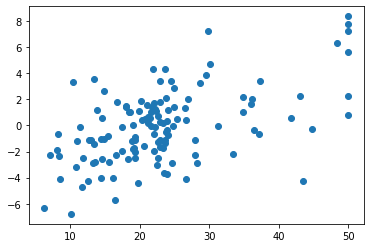

In [12]:
plt.scatter(y_test,residuals)

Graficar el porcentaje de error

In [0]:
abs_residuals = np.abs(residuals) / y_test

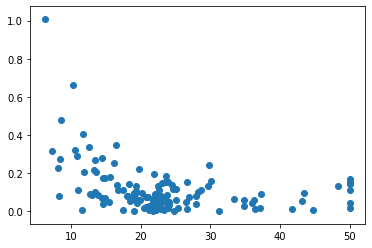

In [14]:
plt.scatter(y_test,abs_residuals)

Pasamos los porcentajes a logaritmo para poder juntar mas los valores, al aplicar el logaritmo los numeros demaciado grandes se achica un poco y se vuelven mas manejables.

Para este caso en especial no es necesario usar logarimo, pero se dejara en forma de ejemplo, ya con el grafico anterior tenemos una vista comoda de los datos.

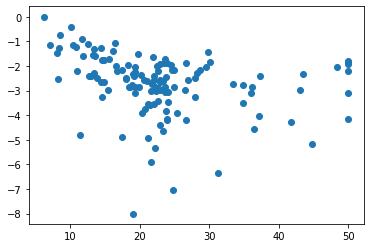

In [15]:
l_abs_residuals = np.log(abs_residuals)
plt.scatter(y_test,l_abs_residuals)

### Seleccion de columnas mas significativas

In [16]:
# Revisamos los pesos
model.feature_importances_

array([1.99312626e-02, 4.78626975e-05, 4.45457438e-03, 6.13771819e-04,
       3.77888737e-02, 2.95643004e-01, 1.35518483e-02, 1.01574477e-01,
       6.77010789e-03, 1.06256881e-02, 3.61314827e-02, 9.61083354e-03,
       4.63256213e-01])

In [0]:
# Opcional
# Compactamos los valores calculandoles el logaritmo
feature_importances = np.floor(np.log10(np.abs(model.feature_importances_)))

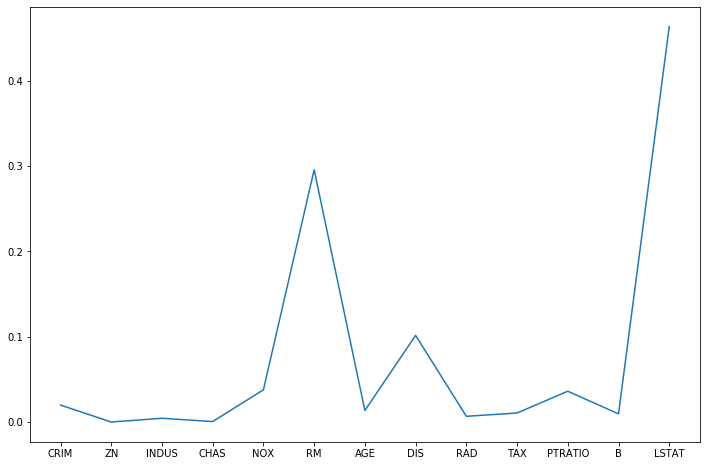

In [18]:

# Graficamos el el coef o feature_importances
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(model.feature_importances_)
plt.xticks(np.arange(len(X.columns)),list(X.columns));

### Aca podemos concluir que nos sirven:
- CRIM
- NOX
- RM
- AGE
- DIS
- RAD
- TAX
- PTRATIO
- B
- LSTAT

### Ahora haremos la misma evaluacion pero con el algoritmo KBest

In [19]:
selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7f9b71d65510>)

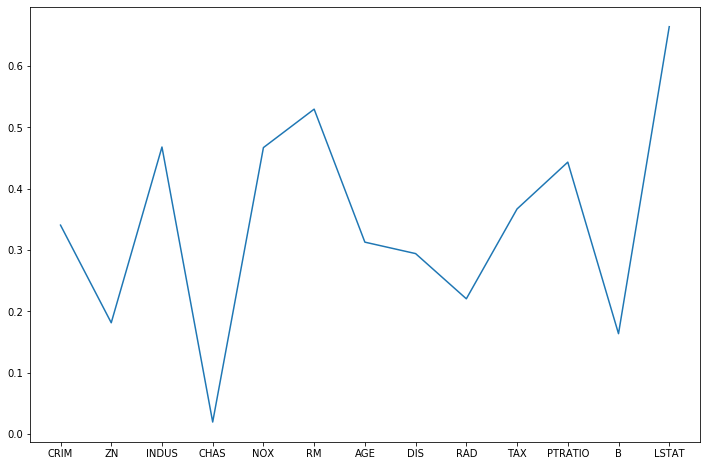

In [20]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(len(boston.feature_names)),list(boston.feature_names));

Mantendremos la lista anterior de forma intacta

Ahora eliminaremos las features restantes

In [0]:
X_train = X_train[["CRIM","NOX", "RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
X_test = X_test[["CRIM","NOX", "RM", "AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]

## Comportamiento con distintos tamaños de Dataset

Revisaremos como se comporta con grupos de datos mas pequeños hasta llegar al tamaño original graficandolo

In [22]:
from sklearn.model_selection import learning_curve

# Definimos 4 grupos con mayor cantidad de datos cada uno
train_sizes = np.linspace(0.1, 1.0, 4)

train_sizes, train_scores, test_scores = learning_curve(GradientBoostingRegressor(),
                                                        X_train,
                                                        y_train, 
                                                        train_sizes=train_sizes,
                                                        n_jobs=4)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


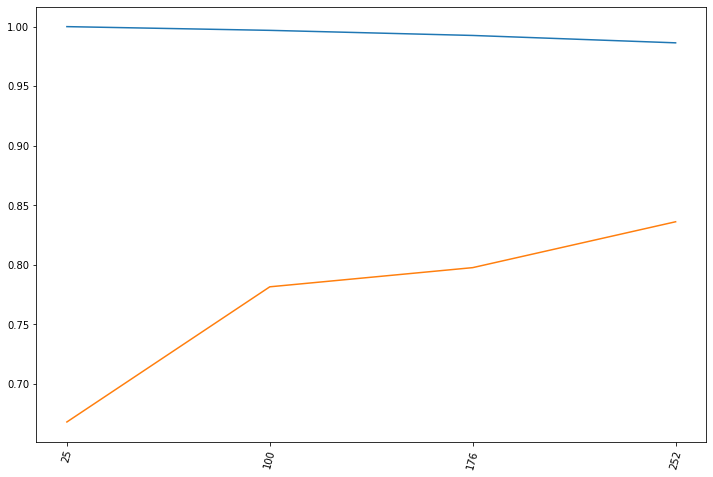

In [23]:
#Graficamos el comportamiento con distintos tamaños de dataset

plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(len(train_sizes)),train_sizes, rotation= 75);

## Overfitting y Underfitting

Las principales causas al obtener malos resultados en Machine Learning son el overfitting o el underfitting de los datos. Cuando entrenamos nuestro modelo intentamos «hacer encajar» -fit en inglés- los datos de entrada entre ellos y con la salida. Tal vez se pueda traducir overfitting como «sobreajuste» y underfitting  como «subajuste» y hacen referencia al fallo de nuestro modelo al generalizar -encajar- el conocimiento que pretendemos que adquieran.

### Sobreajuste
El modelo queda sobre entrenado o es muy complejo para responder solo a los datos de entrenamiento, lo cual causa que cuando se prueben datos nuevos no de las respuestas esperadas

### Subajuste
El modelo empleado es muy complejo o los datos son muy pocos, lo que hace que el modelo sea demaciado simple y no se adecue a todos los casos

In [0]:
results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
test_scores = results['test_score']
train_scores = results['train_score']

In [25]:
# Definimos un rango desde el 1 al 100 de 2 en 2 (pares)
n = np.arange(1, 100, 2)

# Creamos la curva de validacion para GradientBoostingRegressor, variando el hiperparametro n_estimators con los valores de n
train_scores, test_scores = validation_curve(GradientBoostingRegressor(),
                                            X,
                                            y,
                                            param_name='n_estimators',
                                            param_range=n)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


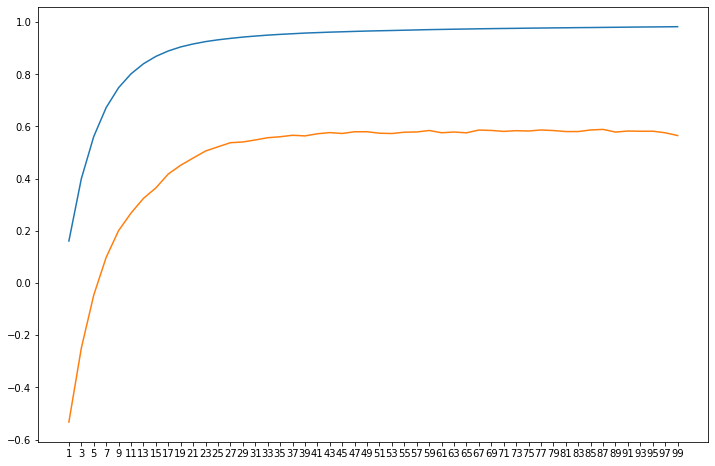

In [26]:
# Graficamos la curva de entrenamiento y de test, Tiene que haber una minima varianza entre ambas para que no halla Overfitting ni Underfitting
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(len(n)),n);

In [27]:
differences = np.mean(train_scores, axis=1)-np.mean(test_scores, axis=1)
differences =  np.stack((n, differences), axis=-1)

differences

array([[ 1.        ,  0.69387766],
       [ 3.        ,  0.64922518],
       [ 5.        ,  0.60775605],
       [ 7.        ,  0.57415521],
       [ 9.        ,  0.54786   ],
       [11.        ,  0.53374687],
       [13.        ,  0.51595269],
       [15.        ,  0.50413923],
       [17.        ,  0.47163885],
       [19.        ,  0.45350538],
       [21.        ,  0.43722838],
       [23.        ,  0.4193391 ],
       [25.        ,  0.4101215 ],
       [27.        ,  0.39991091],
       [29.        ,  0.40203759],
       [31.        ,  0.39829448],
       [33.        ,  0.3932311 ],
       [35.        ,  0.39247306],
       [37.        ,  0.38916609],
       [39.        ,  0.39413316],
       [41.        ,  0.38774753],
       [43.        ,  0.38500079],
       [45.        ,  0.38975756],
       [47.        ,  0.38468914],
       [49.        ,  0.38601159],
       [51.        ,  0.39267909],
       [53.        ,  0.39479506],
       [55.        ,  0.39093606],
       [57.        ,

In [28]:
# Revisamos en que punto la distancia es mas corta entreentrenamiento y test
differences[differences[:,1].argsort()][0]

array([47.        ,  0.38468914])

Concluimos usar el hiper parametro n_estimators en 47 ya que es el punto en el cual estan mas cerca el train_score con el test_score dandonos

In [29]:
# Sin configurar el hiper el hiper parametro n_estimators
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9194532556391495

In [30]:
# Con el hiper parametro n_estimators configurado 
model = GradientBoostingRegressor(n_estimators=47)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9120068112207881

## Optimizacion de hiperparámetros

¿Qué son los hiperparámetros?

Los hiperparámetros son parámetros ajustables que se eligen para entrenar un modelo y que rigen el propio proceso de entrenamiento. Por ejemplo, para entrenar una red neuronal profunda, debe decidir el número de capas ocultas en la red y la cantidad de nodos de cada capa antes de entrenar al modelo. Estos valores suelen permanecer constantes durante el proceso de entrenamiento.

In [0]:
from sklearn.model_selection import GridSearchCV

# Estos son todos los hiper parametros que seran probados al ejecutar el grid search
param_grid = {
    'learning_rate': np.logspace(-10, 2, 8), #10.0**-np.arange(1,7), # learning rate
    'alpha': np.linspace(0.1, 0.9, 8),
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'max_depth': [6,4,6],
    'min_samples_leaf':[3,5,9,17], 
    'max_features':[1.0,0.3,0.1]
}

In [0]:
import warnings
warnings.filterwarnings('ignore')

clf_grid = GridSearchCV(GradientBoostingRegressor(), param_grid)
clf_grid.fit(X_train, y_train)

warnings.filterwarnings('default')

In [37]:
print(clf_grid.best_score_)

clf_best = clf_grid.best_estimator_

clf_best.score(X_test, y_test)

0.8686777445266801


0.9099935710637569

In [38]:
model = clf_best
model

GradientBoostingRegressor(alpha=0.3285714285714286, criterion='friedman_mse',
                          init=None, learning_rate=0.03727593720314938,
                          loss='ls', max_depth=6, max_features=0.3,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=3,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          presort='auto', random_state=None, subsample=1.0,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)

### Revisar nuevamente los residuales

In [0]:
predicted = model.predict(X_test)
residuals = y_test - predicted

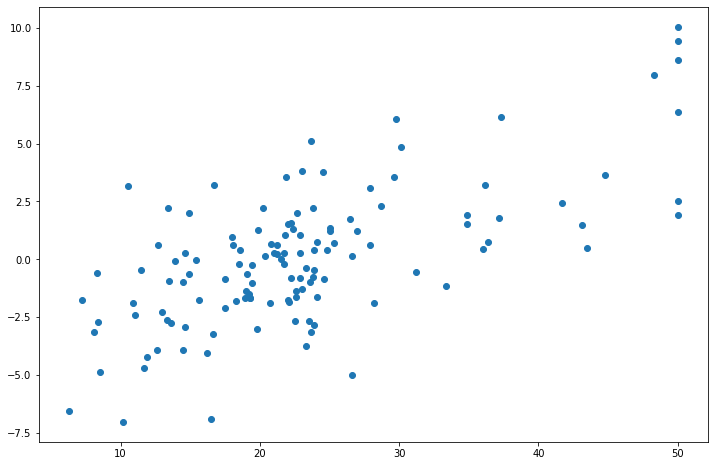

In [40]:
plt.scatter(y_test,residuals)

Pasamos al porcentaje de los residuales absolutos

In [0]:
abs_residuals = np.abs(residuals) / y_test

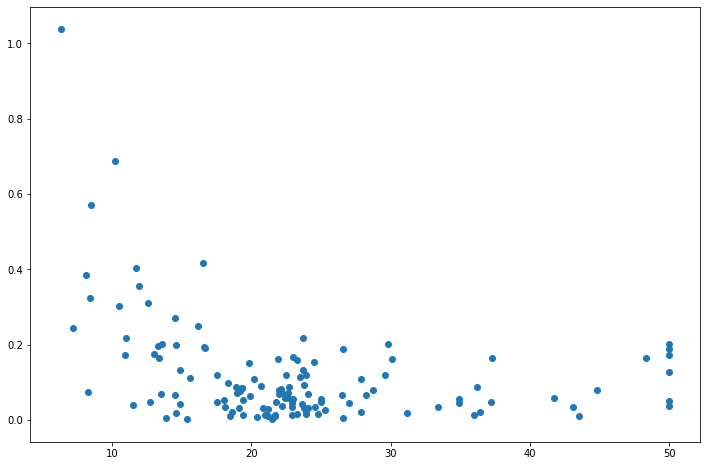

In [42]:
plt.scatter(y_test,abs_residuals)

Aaplicar la funcion logaritmica para obtener valores mas compactos

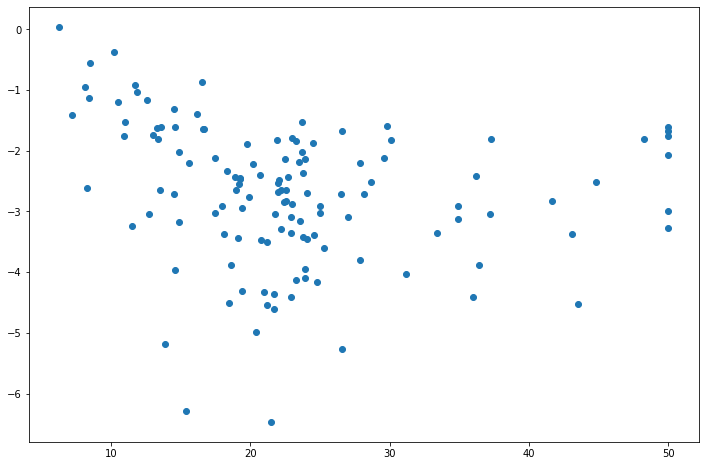

In [43]:
l_abs_residuals = np.log(abs_residuals)
plt.scatter(y_test,l_abs_residuals)


# Fase VI. Deployment.
## Despliegue (puesta en producción)

Aca puede ser desde un informe hasta puesta en marcha de un webservice para realizar predicciones.

Para el ultimo caso se puede utilizar joblib y llevar nuestro modelo entrenado a archivo el cual podemos hacer dump

In [44]:
from sklearn.externals import joblib
joblib.dump(model, 'model.joblib')

from google.colab import files
files.download('./model.joblib') 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.6/threading.py:864: ResourceWarning: unclosed <socket.socket fd=55, family=AddressFamily.AF_INET6, type=SocketKind.SOCK_STREAM, proto=0, laddr=('::', 17582, 0, 0)>
  self._target(*self._args, **self._kwargs)


Y luego importarlo en un proyecto en Flask cargando nuestro archivo de modelo

In [0]:
model = joblib.load('model.joblib')